In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=42)
X = StandardScaler().fit_transform(X)

Distortion – це середня відстань точок до найближчого центроїда у K-Means.

Як це пов'язано з методом ліктя?

Distortion зменшується при збільшенні кластерів, бо точки ближче до центрів.
Але після певного значення k (оптимального), зниження сповільнюється.

На графіку утворюється "лікоть" – точка вигину, де подальше збільшення кластерів дає мінімальний виграш.
Метод ліктя визначає цю точку як оптимальну кількість кластерів.

In [3]:
def plot_elbow_visualizer(model, X, metric='distortion'):
    """
    Plot KElbowVisualizer for clustering methods that support it.
    :param model: clustering model instance
    :param X: dataset
    """
    visualizer = KElbowVisualizer(model, k=(2, 10), timings=False, metric=metric)
    visualizer.fit(X)
    visualizer.show()

Agglomerative Clustering


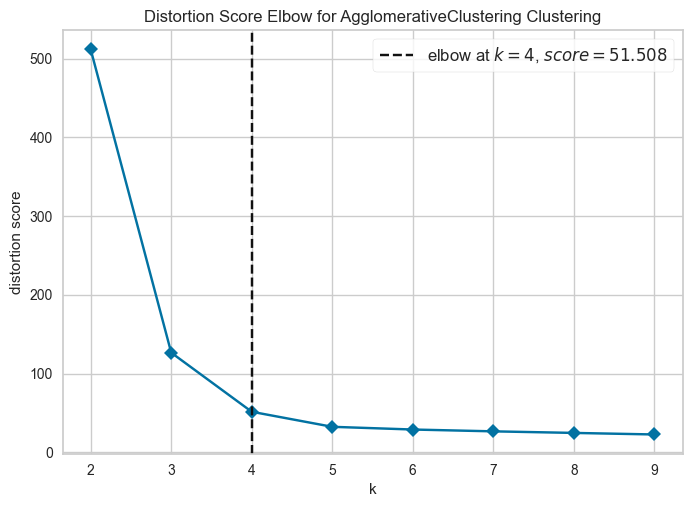

In [4]:
# Agglomerative Clustering
print("Agglomerative Clustering")
plot_elbow_visualizer(AgglomerativeClustering(), X)

K-Means


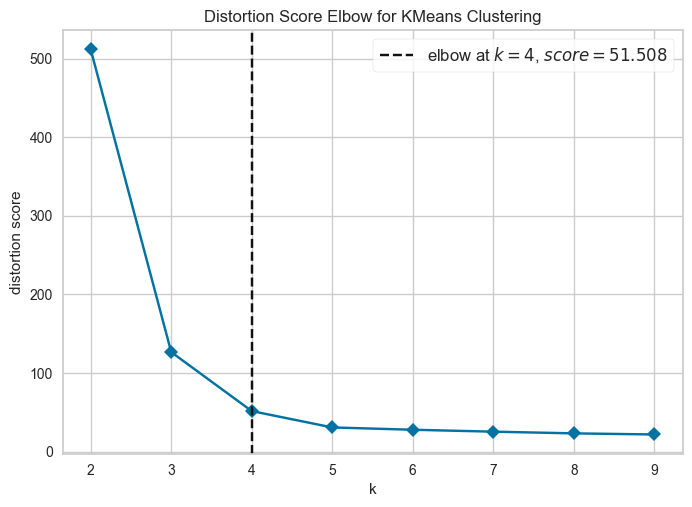

In [5]:
# K-Means
print("K-Means")
plot_elbow_visualizer(KMeans(random_state=42), X)

# використання BIC для GMM

BIC (Bayesian Information Criterion) — це критерій оцінки моделей, який допомагає вибрати оптимальну кількість кластерів у Gaussian Mixture Model (GMM).

🔹 Як працює BIC?

BIC = -2 * log-likelihood + k * log(n),
де:
- log-likelihood — наскільки добре модель підходить до даних
- k — кількість параметрів моделі
- n — кількість спостережень

🔹 Що він означає?

Чим менше значення BIC, тим краща модель (оптимальніша кількість кластерів).
BIC штрафує за складність моделі (занадто багато кластерів → більше параметрів → вище значення BIC).
Використовується для вибору n_components у GMM (як у твоєму коді).

Gaussian Mixture Model (GMM)


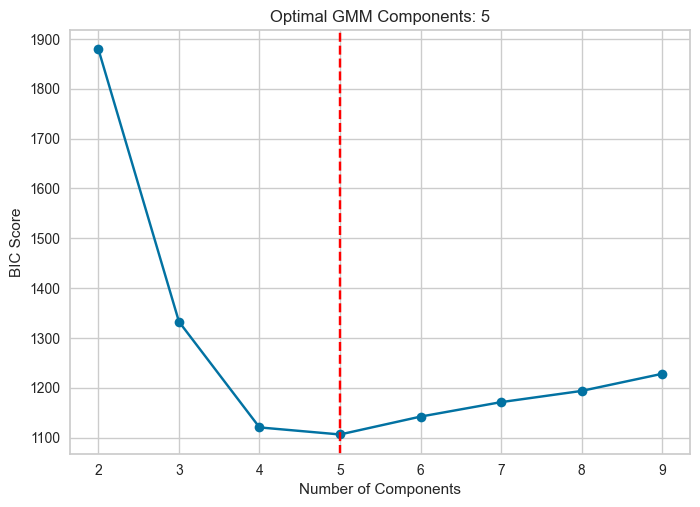

In [6]:
# Gaussian Mixture Model (GMM) - Використовуємо BIC
print("Gaussian Mixture Model (GMM)")

def plot_bic_visualizer(X):
    """
    Plot BIC score for GMM.
    :param X: dataset
    """
    bic_scores = []
    k_values = range(2, 10)
    for k in k_values:
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(X)
        bic_scores.append(gmm.bic(X))

    optimal_k = k_values[np.argmin(bic_scores)]
    plt.plot(k_values, bic_scores, marker='o')
    plt.xlabel("Number of Components")
    plt.ylabel("BIC Score")
    plt.title(f"Optimal GMM Components: {optimal_k}")
    plt.axvline(optimal_k, linestyle='--', color='red')
    plt.show()

plot_bic_visualizer(X)

# оцінка через сілует

Agglomerative Clustering


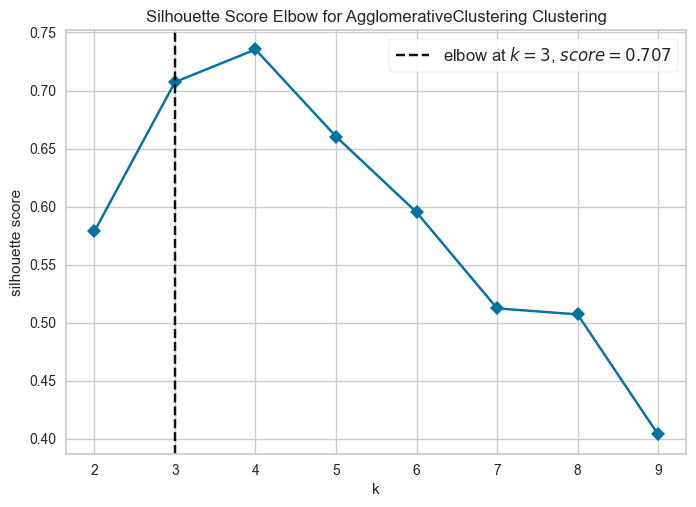

In [7]:
# Agglomerative Clustering
print("Agglomerative Clustering")
plot_elbow_visualizer(AgglomerativeClustering(), X, metric='silhouette')